In [54]:
import os
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd

In [55]:
DATA_DIR = 'lr'

In [106]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def plot_csv(data_dir, sample_num=10, ylabel="loss", start=None, end=None):
    
    markers = ['.', 'v', 's', 'x', 'd']
    cur_marker = 0
    ax = pl.gca()
    legends = []
    
    for file in os.listdir(data_dir):
        if not file.endswith(".csv"):
            continue
            
        legends.append(file[:-4])
        pd_data = pd.read_csv(os.path.join(data_dir, file))
        np_data = pd_data[["Step","Value"]].values
        np_data[:, 1] = smooth(np_data[:, 1], 3)
        
        s = 0 if start is None else start
        e = np_data.shape[0] - 1 if end is None else end            
        selected_index = np.linspace(s, e, sample_num, dtype=int)
        
        selected_row = np_data[selected_index]
        ax.plot(selected_row[:, 0], selected_row[:, 1], marker=markers[cur_marker % len(markers)])
        cur_marker += 1
        
    ax.legend(legends)
    ax.set_xlabel("step")
    ax.set_ylabel(ylabel)
    
    return ax

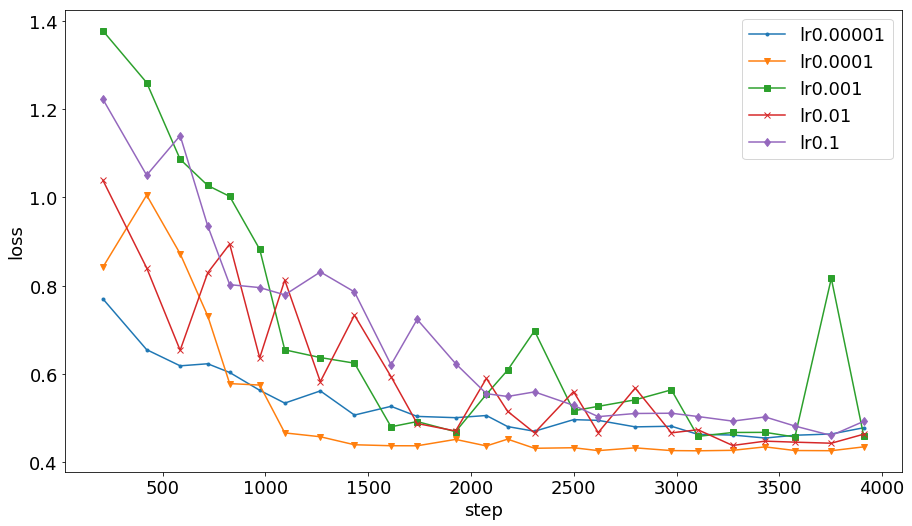

In [108]:
pl.rcParams.update({'font.size': 18})
fig = pl.gcf()
fig.set_size_inches(15, 8.5)
ax = plot_csv("lr", sample_num=25, start=40, end=900)
fig.savefig('lr/lr.png')

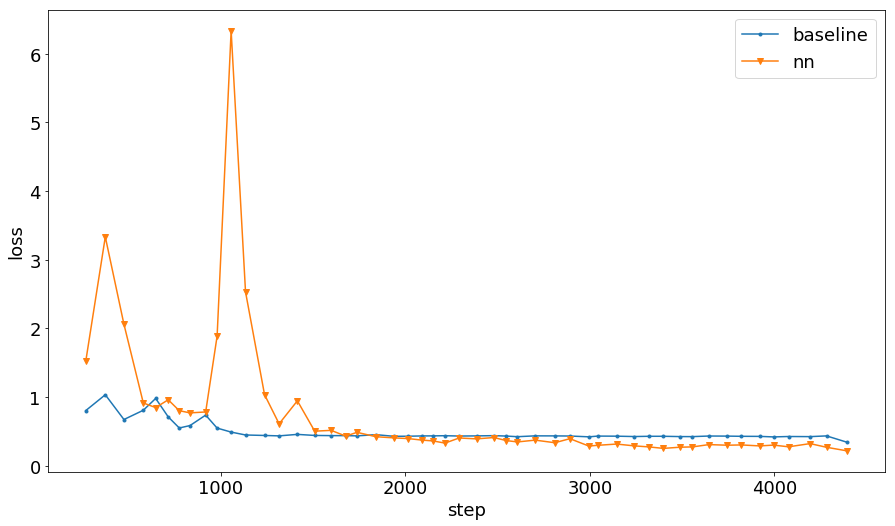

In [117]:
pl.rcParams.update({'font.size': 18})
fig = pl.gcf()
fig.set_size_inches(15, 8.5)
ax = plot_csv("nn", sample_num=50, start=50, end=None)
fig.savefig('nn/nn.png')